# Dimensionality Reduction
---

Evaluating the relations between computation time and the number of samples for the following dimensionality reduction methods: __PCA__, __MDS__, __Isomap__, __Spectral Embedding__ and __t-SNE__. The input data is MNIST handwritten digits data. For each fitting, the number of input data points is varied and a random sample of data points taken from the original data (_random sampling without replacement_). This is done for 21 sample sizes that are equividistant in a logarithimic scale (base 10) between the end points 100 to 1000 (1083 is the total number of points in the MNIST dataset) up to rounding to integers. For each sample size and dimensionality reduction method, 5 repeated computations run, compute and record the mean computation time from these runs. Produce a plot that shows the mean computation time versus the sample size for different dimensionality reduction methods (all in one plot) in log-log scale. Assess and discuss the obtained results.

---

In [292]:
# load packages 
from time import time
import random as r
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
# import warnings filter (to ignore scikit-learn future warnings)
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [293]:
# load MNIST data
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target

n_samples, n_features = X.shape
n_neighbors = 30

# MNIST data
data_df = pd.DataFrame(X)
# compute time, an array of zeros as a holding place for now
ctime = np.zeros(8)
# set file name here
fname = 'ctime.csv'

---

## PCA

In [294]:
# generate 21 random sample sizes equividistant in a logarithimic scale 
PCA_sample_sizes = list(np.logspace(3, 2, num=21, endpoint=True, base=10.0, dtype=int))
PCA_df = pd.DataFrame(columns=['sample','runtime'])
# sample from the data for each of these 21 sample sizes
for smpl_size in PCA_sample_sizes:
    sample = data_df.sample(smpl_size)
    # fit the data to dimension reduction method 5 times and generate computation times 
    for i in range(5): 
        clf = decomposition.TruncatedSVD(n_components=2)
        t0 = time()
        Y = clf.fit_transform(sample-sample.mean(axis=0))
        dt = time() - t0
        ctime[0] = dt
    runtime = np.mean(ctime)
    add_data = [{'sample':smpl_size, 'runtime':runtime}]
    PCA_df = PCA_df.append(add_data,ignore_index=True,sort=False)
PCA_df = PCA_df.sort_values('sample')

## MDS

In [295]:
# generate 21 random sample sizes equividistant in a logarithimic scale 
MDS_sample_sizes = list(np.logspace(3, 2, num=21, endpoint=True, base=10.0, dtype=int))
MDS_df = pd.DataFrame(columns=['sample','runtime'])
# sample from the data for each of these 21 sample sizes
for smpl_size in MDS_sample_sizes:
    sample = data_df.sample(smpl_size)
    # fit the data to dimension reduction method 5 times and generate computation times 
    for i in range(5): 
        clf = manifold.MDS(n_components=2, n_init=1, max_iter=10)
        t0 = time()
        Y = clf.fit_transform(sample)
        dt = time() - t0
        ctime[0] = dt 
    runtime = np.mean(ctime)
    add_data = [{'sample':smpl_size, 'runtime':runtime}]
    MDS_df = MDS_df.append(add_data,ignore_index=True,sort=False)
MDS_df = MDS_df.sort_values('sample')

## ISOMAP

In [296]:
# generate 21 random sample sizes equividistant in a logarithimic scale 
ISOMAP_sample_sizes = list(np.logspace(3, 2, num=21, endpoint=True, base=10.0, dtype=int))
ISOMAP_df = pd.DataFrame(columns=['sample','runtime'])
# sample from the data for each of these 21 sample sizes
for smpl_size in ISOMAP_sample_sizes:
    sample = data_df.sample(smpl_size)
    # fit the data to dimension reduction method 5 times and generate computation times 
    for i in range(5): 
        clf = manifold.Isomap(n_neighbors, n_components=2)
        t0 = time()
        Y = clf.fit_transform(sample)
        dt = time() - t0
        ctime[0] = dt
    runtime = np.mean(ctime)
    add_data = [{'sample':smpl_size, 'runtime':runtime}]
    ISOMAP_df = ISOMAP_df.append(add_data,ignore_index=True,sort=False)
ISOMAP_df = ISOMAP_df.sort_values('sample')

## Spectral Embedding

In [297]:
# generate 21 random sample sizes equividistant in a logarithimic scale 
SpecEmb_sample_sizes = list(np.logspace(3, 2, num=21, endpoint=True, base=10.0, dtype=int))
SpecEmb_df = pd.DataFrame(columns=['sample','runtime'])
# sample from the data for each of these 21 sample sizes
for smpl_size in SpecEmb_sample_sizes:
    sample = data_df.sample(smpl_size)
    # fit the data to dimension reduction method 5 times and generate computation times 
    for i in range(5): 
        clf = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack", affinity='nearest_neighbors', n_neighbors=n_neighbors)
        t0 = time()
        Y = clf.fit_transform(sample)
        dt = time() - t0
        ctime[0] = dt
    runtime = np.mean(ctime)
    add_data = [{'sample':smpl_size, 'runtime':runtime}]
    SpecEmb_df = SpecEmb_df.append(add_data,ignore_index=True,sort=False)
SpecEmb_df = SpecEmb_df.sort_values('sample')

## t-SNE

In [298]:
# generate 21 random sample sizes equividistant in a logarithimic scale 
TSNE_sample_sizes = list(np.logspace(3, 2, num=21, endpoint=True, base=10.0, dtype=int))
TSNE_df = pd.DataFrame(columns=['sample','runtime'])
# sample from the data for each of these 21 sample sizes
for smpl_size in TSNE_sample_sizes:
    sample = data_df.sample(smpl_size)
    # fit the data to dimension reduction method 5 times and generate computation times 
    for i in range(5): 
        clf = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack", affinity='nearest_neighbors', n_neighbors=n_neighbors)
        t0 = time()
        Y = clf.fit_transform(sample)
        dt = time() - t0
        ctime[0] = dt
    runtime = np.mean(ctime)
    add_data = [{'sample':smpl_size, 'runtime':runtime}]
    TSNE_df = TSNE_df.append(add_data,ignore_index=True,sort=False)
TSNE_df = TSNE_df.sort_values('sample')

### Plotting

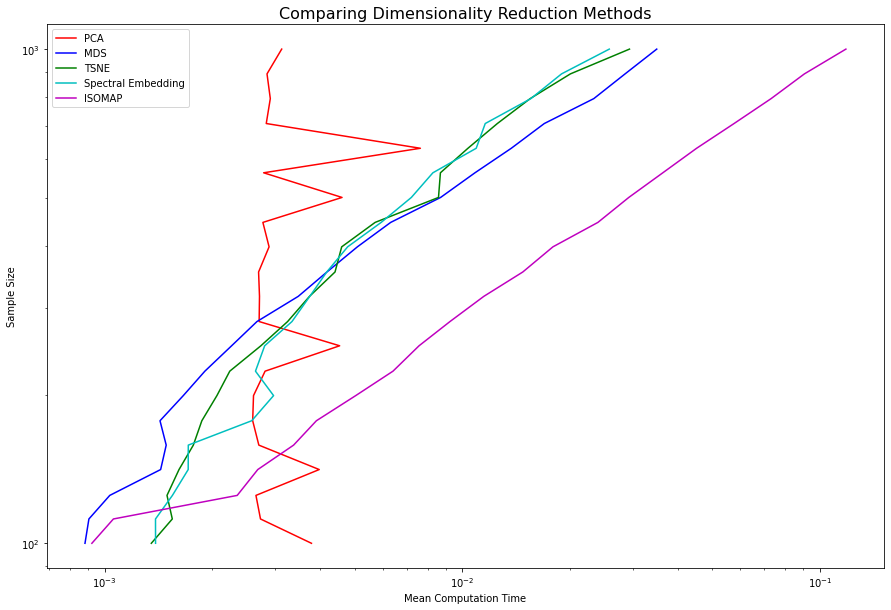

In [299]:
# Plotting mean computation time versus the sample size 
# for different dimensionality reduction methods on log-log scale.
plt.figure(figsize = (15, 10))
plt.loglog(PCA_df['runtime'], PCA_df['sample'], color='r', label='PCA')   
plt.loglog(MDS_df['runtime'], MDS_df['sample'], color='b', label='MDS') 
plt.loglog(TSNE_df['runtime'], TSNE_df['sample'], color='g', label='TSNE') 
plt.loglog(SpecEmb_df['runtime'], SpecEmb_df['sample'], color='c', label='Spectral Embedding') 
plt.loglog(ISOMAP_df['runtime'], ISOMAP_df['sample'], color='m', label='ISOMAP') 
plt.xlabel('Mean Computation Time', fontsize = 10)
plt.ylabel('Sample Size', fontsize = 10)
plt.legend(loc = 'best')
plt.title('Comparing Dimensionality Reduction Methods', 
          fontdict=None, loc='center', pad=None, fontsize = 16)
plt.show()   


### Assess and discuss the obtained results.
The most efficient dimensionality reduction method when assessed by mean computation time is PCA. The graph above shows that mean computation time for PCA does stays relatively constant as sample size increases. Comparatively, despite being a more advanced and newer menthod, the mean computation time for ISOMAP increases fastest as a function of sample size. MDS, TSNE and Spectral Embedding all increase as a function of sample size at a similar rate to one another.